In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset = pd.read_csv("Posisi_gaji.csv")
dataset

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [26]:
x = dataset.iloc[:, 1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [27]:
y = dataset.iloc[:, 2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [28]:
#Dalam kasus ini tidak perlu pembagian train & test set karena data terlalu kecil (<15) 
#Regresi linear dan polinomial sudah ada feature scaling didalamnya, jadi kita tidak perlu scaling manual
#Fitting linear regression ke dataset
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#Fitting polynomial regression ke dataset
from sklearn.preprocessing import PolynomialFeatures
polyReg = PolynomialFeatures(degree=4) #semakin tinggi degreenya, semakin fit bahkan overfit senhingga jangan terlalu tinggi
xPoly = polyReg.fit_transform(x)
linReg2 = LinearRegression()
linReg2.fit(xPoly, y)
xPoly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

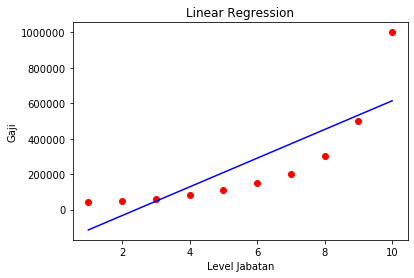

In [30]:
#Visualisasi hasil regresi linear sederhana ==> tidak fit
plt.scatter(x, y, color="red")
plt.plot(x, linReg.predict(x), color="blue")
plt.title("Linear Regression")
plt.xlabel("Level Jabatan")
plt.ylabel("Gaji")
plt.show()

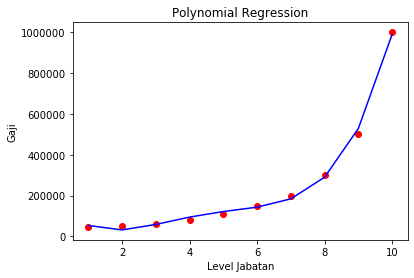

In [31]:
#Visualisasi hasil regresi polinomial
plt.scatter(x, y, color="red")
plt.plot(x, linReg2.predict(xPoly), color="blue")
plt.title("Polynomial Regression")
plt.xlabel("Level Jabatan")
plt.ylabel("Gaji")
plt.show()

In [32]:
#Memprediksi hasil dengan regresi linear sederhana
xp=np.array([[6.5]])
xp.reshape(-1, 1)
linReg.predict(xp)

array([330378.78787879])

In [33]:
#Memprediksi hasil dengan regresi polinomial
linReg2.predict(polyReg.fit_transform(xp))

array([158862.45265155])

In [34]:
import statsmodels.api as sma
#sma.add_constant(xPoly)
xPoly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [35]:
#import statsmodels.api as sm
#xOpt = x[:, [0, 1, 2, 3, 4, 5]]
regressorOLS = sma.OLS(endog=y, exog=xPoly).fit()
regressorOLS.summary()
#Persamaan regresi polinomial derajat 4:
#Gaji = 184200 - 211000*Level + 94770*(Level**2) - 15460*(Level**3) + 890.1515*(Level**4)

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1449: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     478.1
Date:                Sat, 02 May 2020   Prob (F-statistic):           1.21e-06
Time:                        11:15:36   Log-Likelihood:                -110.01
No. Observations:                  10   AIC:                             230.0
Df Residuals:                       5   BIC:                             231.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.842e+05   6.78e+04      2.718      0.042    9963.382    3.58e+05
x1          -2.11e+05   7.64e+04     -2.762      0.040   -4.07e+05   -1.47e+04
x2          9.477e+04   2.65e+04      3.582      0.016    2.68e+04    1.63e+05
x3         -1.546e+04   3534.989     -4.374      0.007   -2.46e+04   -6376.309
x4           890.1515    159.803      5.570      0.003     479.364    1300.939
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.767
Skew:                          -0.529   Prob(JB):                        0.681
Kurtosis:                       2.149   Cond. No.                     6.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
xNew = []
for i in range(0, 14, 1):
    xNew.append([i])
xPolyNew = polyReg.fit_transform(xNew)
yNew = linReg2.predict(xPolyNew)
yNew

array([ 184166.6666672 ,   53356.64335676,   31759.90675985,
         58642.19114211,   94632.86713282,  121724.94172495,
        143275.05827509,  184003.49650352,  289994.17249417,
        528694.63869462,  988916.08391611, 1780833.33333357,
       3035984.84848555, 4907272.72727428])

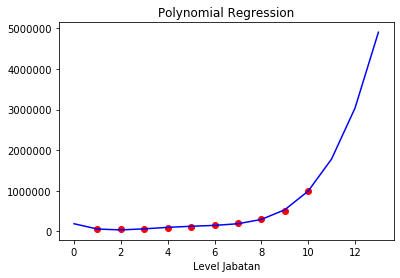

In [45]:
plt.scatter(x, y, color="red")
plt.plot(xNew, yNew, color="blue")
plt.title("Polynomial Regression")
plt.xlabel("Level Jabatan")
plt.ylabel("")
plt.show()